In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [2]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)


In [3]:
mouse_drug_data.head(5)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
combine_data = pd.merge(clinical_trial_data, mouse_drug_data, how = "left", on = ["Mouse ID","Mouse ID"])

# Display the data table for preview

combine_data.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [6]:
combine_data.describe

<bound method NDFrame.describe of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites       Drug
0        b128          0           45.000000                 0  Capomulin
1        f932          0           45.000000                 0   Ketapril
2        g107          0           45.000000                 0   Ketapril
3        a457          0           45.000000                 0   Ketapril
4        c819          0           45.000000                 0   Ketapril
5        h246          0           45.000000                 0   Ketapril
6        p189          0           45.000000                 0   Ketapril
7        n923          0           45.000000                 0   Ketapril
8        q119          0           45.000000                 0   Ketapril
9        f993          0           45.000000                 0   Naftisol
10       z234          0           45.000000                 0   Naftisol
11       b559          0           45.000000                 0   Naftisol
12  

## Tumor Response to Treatment

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = combine_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
mean_tumor_grp = pd.DataFrame(mean_tumor_vol)
# Preview DataFrame
mean_tumor_grp.head(5)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor_vol).reset_index()
# Preview DataFrame
tumor_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_standard_error = combine_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_standard_error_df = pd.DataFrame(tumor_standard_error).reset_index()
# Preview DataFrame
tumor_standard_error_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames

Data_munged = tumor_df.pivot_table(index = "Timepoint",columns = "Drug",values = "Tumor Volume (mm3)")

tumor_standard_error_pivot = tumor_standard_error_df.pivot_table(index = "Timepoint",columns = "Drug",values = "Tumor Volume (mm3)")
# Preview that Reformatting worked

Data_munged.head(5) 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


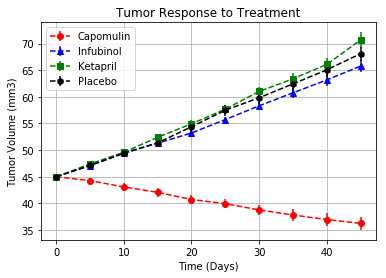

In [11]:
# Generate the Plot (with Error Bars)

Time = [0,5,10,15,20,25,30,35,40,45]

# Setting up the plot
fig, ax = plt.subplots()

ax.errorbar(Time, Data_munged["Capomulin"], yerr = tumor_standard_error_pivot["Capomulin"], label ="Capomulin", marker = "o", color = "r", linestyle = "--")
ax.errorbar(Time, Data_munged["Infubinol"], yerr = tumor_standard_error_pivot["Infubinol"], label ="Infubinol", marker = "^", color = "b", linestyle = "--")
ax.errorbar(Time, Data_munged["Ketapril"], yerr = tumor_standard_error_pivot["Ketapril"], label ="Ketapril", marker = "s", color = "g", linestyle = "--")
ax.errorbar(Time, Data_munged["Placebo"], yerr = tumor_standard_error_pivot["Placebo"], label ="Placebo", marker = "h", color = "k", linestyle = "--")

ax.legend()
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid()


# Save the Figure
plt.savefig("../Images/Tumor_Response.png")


In [12]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_Metastatic_Sites = combine_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
mean_Met_sites = pd.DataFrame(mean_Metastatic_Sites)
# Preview DataFrame
mean_Met_sites.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [14]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Metastatic_Sites_error = combine_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
sem_Met_Sites = pd.DataFrame(Metastatic_Sites_error)
# Preview DataFrame
sem_Met_Sites.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [15]:
# Minor Data Munging to Re-Format the Data Frames
munged_Mean_Met = mean_Met_sites.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

munged_sem_Met = sem_Met_Sites.pivot_table(index = "Timepoint", columns = "Drug", values = "Metastatic Sites")
# Preview that Reformatting worked
munged_Mean_Met.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


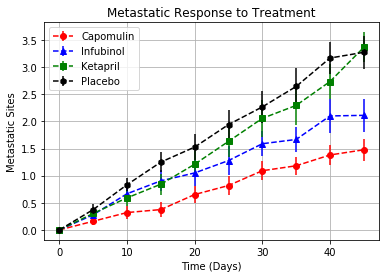

In [16]:
# Generate the Plot (with Error Bars)
Time = [0,5,10,15,20,25,30,35,40,45]

# Setting up the plot
fig, ax = plt.subplots()

ax.errorbar(Time, munged_Mean_Met["Capomulin"], yerr = munged_sem_Met["Capomulin"], label ="Capomulin", marker = "o", color = "r", linestyle = "--")
ax.errorbar(Time, munged_Mean_Met["Infubinol"], yerr = munged_sem_Met["Infubinol"], label ="Infubinol", marker = "^", color = "b", linestyle = "--")
ax.errorbar(Time, munged_Mean_Met["Ketapril"], yerr = munged_sem_Met["Ketapril"], label ="Ketapril", marker = "s", color = "g", linestyle = "--")
ax.errorbar(Time, munged_Mean_Met["Placebo"], yerr = munged_sem_Met["Placebo"], label ="Placebo", marker = "h", color = "k", linestyle = "--")

ax.legend()
ax.set_title("Metastatic Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Metastatic Sites")
ax.grid()


# Save the Figure
plt.savefig("../Images/Metastatic Response.png")

# Show the Figure
plt.show()

## Survival Rates

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combine_data.groupby(["Drug","Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
# Preview DataFrame
mice_count_df.head(5)


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [18]:
# Minor Data Munging to Re-Format the Data Frames
munged_count_mice = mice_count_df.pivot_table(index = "Timepoint", columns = "Drug", values = "Mouse ID")

# Preview the Data Frame
munged_count_mice.head(5)



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


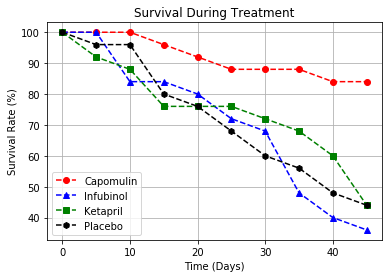

In [19]:
# Generate the Plot (Accounting for percentages)
# Setting up the plot
Time = [0,5,10,15,20,25,30,35,40,45]
# Setting up the plot
plt.plot(Time,(munged_count_mice["Capomulin"]/25)*100, label ="Capomulin", marker = "o", color = "r", linestyle = "--")
plt.plot(Time,(munged_count_mice["Infubinol"]/25)*100, label ="Infubinol", marker = "^", color = "b", linestyle = "--")
plt.plot(Time,(munged_count_mice["Ketapril"]/25)*100, label ="Ketapril", marker = "s", color = "g", linestyle = "--")
plt.plot(Time,(munged_count_mice["Placebo"]/25)*100, label ="Placebo", marker = "h", color = "k", linestyle = "--")

plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig("../Images/Survival Rate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
tumor_percentage_change = ((Data_munged.iloc[-1] - Data_munged.loc[0])/Data_munged.loc[0])*100

# Display the data to confirm
tumor_percentage_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

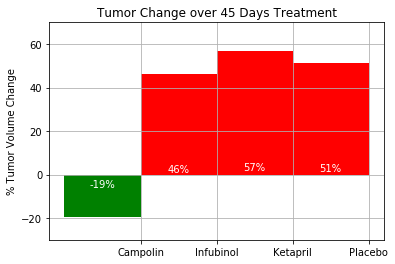

In [25]:
# Store all Relevant Percent Changes into a Tuple
percentage_change = (tumor_percentage_change["Capomulin"],
               tumor_percentage_change["Infubinol"],
               tumor_percentage_change["Ketapril"],
               tumor_percentage_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
index = np.arange(len(percentage_change))
width = 1
passing_drug = ax.bar(index[0], percentage_change[0], width, color= "green")
failing_drug = ax.bar(index[1:], percentage_change[1:], width, color= "red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change over 45 Days Treatment")
ax.set_xticks(index + 0.5)
ax.set_xticklabels(("Campolin","Infubinol","Ketapril","Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, .1*height, "%d" %int(height)+ "%",
                ha="center", va="top", color="white")


# Call functions to implement the function calls
autolabel(passing_drug)
autolabel(failing_drug)

# Save the Figure
fig.savefig("../Images/Percentage_Tumor_Volume_Change.png")

# Show the Figure
fig.show()
